# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".

**Github :** 

# Desarrollo


In [1]:
import numpy as np
import pandas as pd
import pylab as plt
#from google.colab import drive
from scipy.optimize import curve_fit

In [2]:
datos=pd.read_csv('owid-covid-data.csv')
datos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169934,ZWE,Africa,Zimbabwe,2022-03-16,243650.0,741.0,472.429,5418.0,2.0,2.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169935,ZWE,Africa,Zimbabwe,2022-03-17,243650.0,0.0,300.286,5418.0,0.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169936,ZWE,Africa,Zimbabwe,2022-03-18,244012.0,362.0,352.000,5420.0,2.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169937,ZWE,Africa,Zimbabwe,2022-03-19,244452.0,440.0,340.429,5426.0,6.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169939 entries, 0 to 169938
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    169939 non-null  object 
 1   continent                                   159788 non-null  object 
 2   location                                    169939 non-null  object 
 3   date                                        169939 non-null  object 
 4   total_cases                                 166713 non-null  float64
 5   new_cases                                   166519 non-null  float64
 6   new_cases_smoothed                          164520 non-null  float64
 7   total_deaths                                148745 non-null  float64
 8   new_deaths                                  148768 non-null  float64
 9   new_deaths_smoothed                         146643 non-null  float64
 

## Argentina


In [4]:
paises=datos['location'] #cargo el vector de paises
confirmados=datos['total_cases'] #carga vector todos los casos confirmados

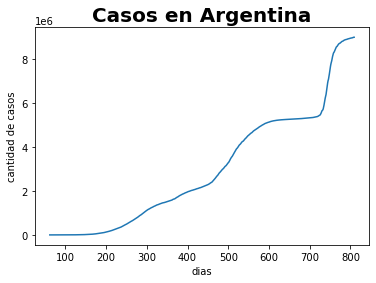

In [5]:
#seleccionamos Argentina

ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Argentina' , fontweight = 'black', fontsize=20);

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


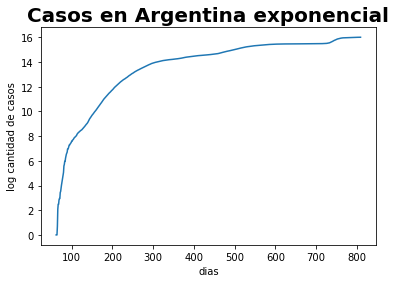

In [6]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Argentina exponencial' , fontweight = 'black', fontsize=20);

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial, caabe resaltar que el primer caso que se dio en Argentina, se efectuo al día 62 de haber comenzado la pandemia

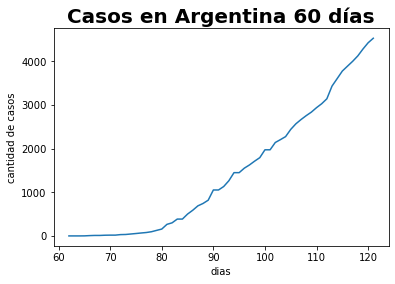

In [7]:
casos_principio=casos_arg[62:122]
dias_principio=dias[62:122]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Argentina 60 días' , fontweight = 'black', fontsize=20);

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

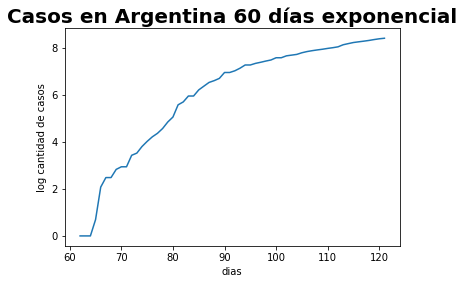

In [8]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Argentina 60 días exponencial' , fontweight = 'black', fontsize=20);

Mejor nos quedamos con lo que sucede entre los días 65 y 90 de pandemia, ya que ese fue el comportamiento más sostenido.

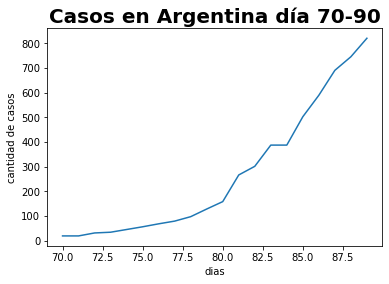

In [9]:
casos_principio=casos_arg[70:90]
dias_principio=dias[70:90]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Argentina día 70-90' , fontweight = 'black', fontsize=20);

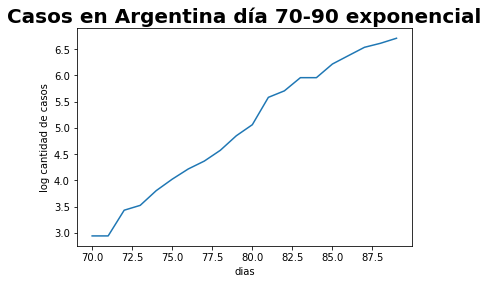

In [10]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Argentina día 70-90 exponencial' , fontweight = 'black', fontsize=20);

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [11]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [12]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([ 0.16794005, 48.52899733])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

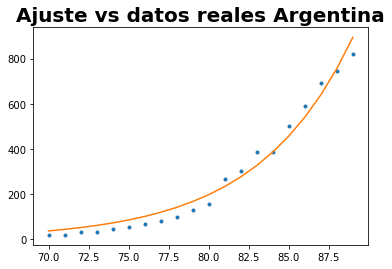

In [13]:
#gráfico de ajuste
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Argentina' , fontweight = 'black', fontsize=20);

Los datos del modelo que se emplea se ajusta bien a los datos reales cuando el país es Argentina

In [14]:
t0_Argentina = dias_principio[0]
t_Argentina = dias_principio[-1]
k_Argentina = k

dic_Argentina = {'Pais':'Argentina', 't0': [t0_Argentina],'t': [t_Argentina],'k':[k_Argentina]}
df_Argentina = pd.DataFrame(data=dic_Argentina)
df_Argentina

,Pais,t0,t,k
0,Argentina,70,89,0.16794


Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [15]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

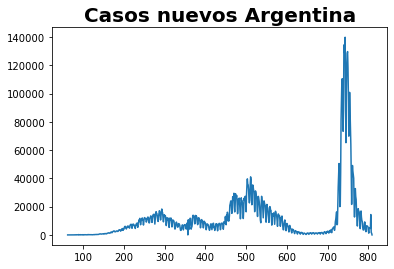

In [16]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)
plt.title('Casos nuevos Argentina' , fontweight = 'black', fontsize=20);

## Canada


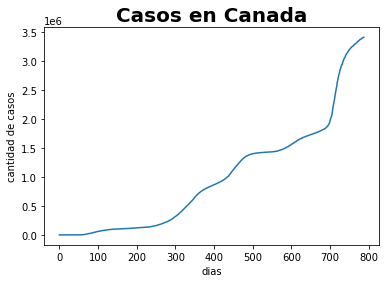

In [17]:
#seleccionamos Canada
ind_cd=np.where(paises=='Canada')
ind_cd=ind_cd[0]
casos_cd=confirmados[ind_cd]
dias=np.arange(0,len(casos_cd))
plt.plot(dias,casos_cd)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Canada' , fontweight = 'black', fontsize=20);

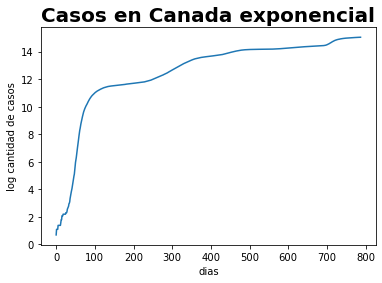

In [18]:
plt.plot(dias,np.log(casos_cd))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Canada exponencial' , fontweight = 'black', fontsize=20);

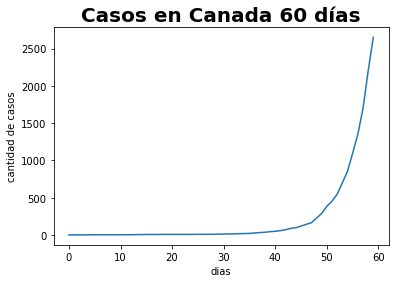

In [19]:
casos_principio=casos_cd[0:60]
dias_principio=dias[0:60]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Canada 60 días' , fontweight = 'black', fontsize=20);

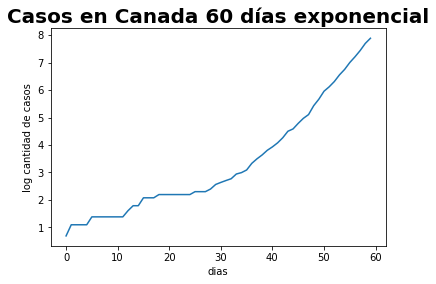

In [20]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Canada 60 días exponencial' , fontweight = 'black', fontsize=20);

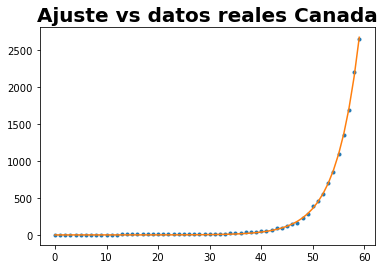

In [21]:
#ajustamos Canada
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Canada' , fontweight = 'black', fontsize=20);

In [22]:
t0_Canada = dias_principio[0]
t_Canada = dias_principio[-1]
k_Canada = k

dic_Canada = {'Pais':'Canada', 't0': [t0_Canada],'t': [t_Canada],'k':[k_Canada]}
df_Canada = pd.DataFrame(data=dic_Canada)
df_Canada

,Pais,t0,t,k
0,Canada,0,59,0.223013


## Japon


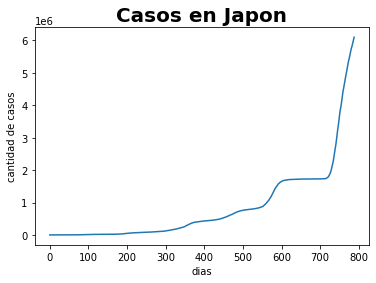

In [23]:
#seleccionamos Japon

ind_jp=np.where(paises=='Japan')
ind_jp=ind_jp[0]
casos_jp=confirmados[ind_jp]
dias=np.arange(0,len(casos_jp))
plt.plot(dias,casos_jp)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Japon' , fontweight = 'black', fontsize=20);

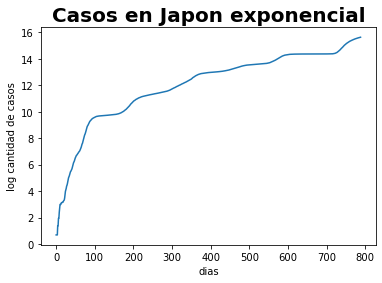

In [24]:
plt.plot(dias,np.log(casos_jp))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Japon exponencial' , fontweight = 'black', fontsize=20);

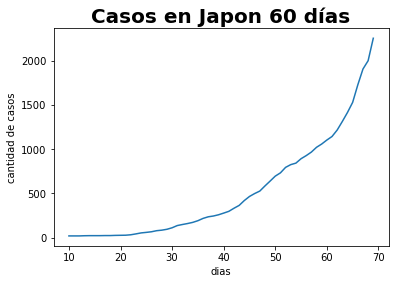

In [25]:
casos_principio=casos_jp[10:70]
dias_principio=dias[10:70]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Japon 60 días' , fontweight = 'black', fontsize=20);

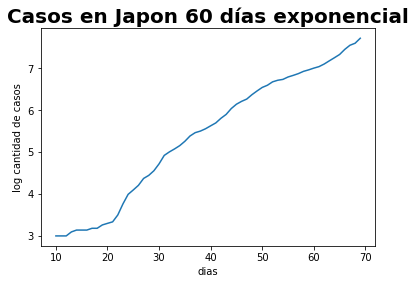

In [26]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Japon 60 días exponencial' , fontweight = 'black', fontsize=20);

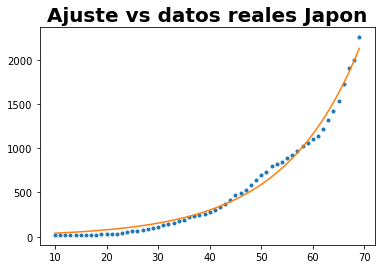

In [27]:
#ajustamos Japon
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Japon' , fontweight = 'black', fontsize=20);

In [28]:
t0_Japon = dias_principio[0]
t_Japon = dias_principio[-1]
k_Japon = k

dic_Japon = {'Pais':'Japon', 't0': [t0_Japon],'t': [t_Japon],'k':[k_Japon]}
df_Japon = pd.DataFrame(data=dic_Japon)
df_Japon

,Pais,t0,t,k
0,Japon,10,69,0.067459


## Portugal


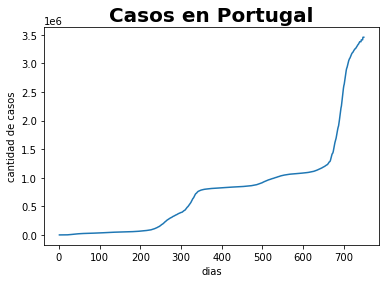

In [29]:
#seleccionamos Portugal

ind_po=np.where(paises=='Portugal')
ind_po=ind_po[0]
casos_po=confirmados[ind_po]
dias=np.arange(0,len(casos_po))
plt.plot(dias,casos_po)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Portugal' , fontweight = 'black', fontsize=20);

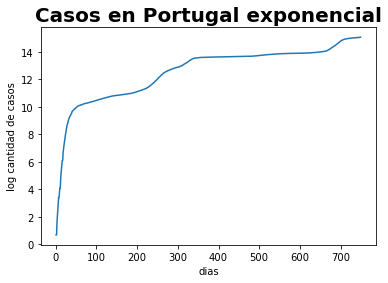

In [30]:
plt.plot(dias,np.log(casos_po))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Portugal exponencial' , fontweight = 'black', fontsize=20);

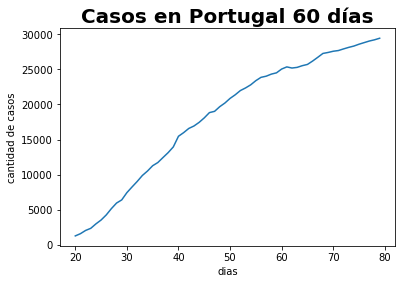

In [31]:
casos_principio=casos_po[20:80]
dias_principio=dias[20:80]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Portugal 60 días' , fontweight = 'black', fontsize=20);

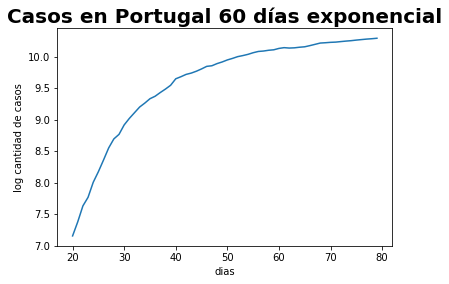

In [32]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Portugal 60 días exponencial' , fontweight = 'black', fontsize=20);

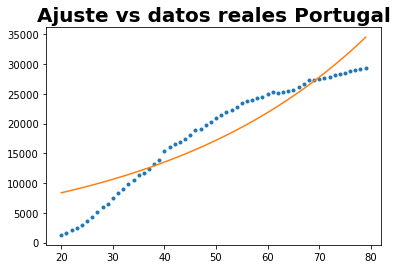

In [33]:
#ajustamos Portugal
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Portugal' , fontweight = 'black', fontsize=20);

Los datos del modelo que se dearrolla no se ajusta de la mejor forma a los datos reales para Portugal

In [34]:
t0_Portugal = dias_principio[0]
t_Portugal = dias_principio[-1]
k_Portugal = k

dic_Portugal = {'Pais':'Portugal', 't0': [t0_Portugal],'t': [t_Portugal],'k':[k_Portugal]}
df_Portugal = pd.DataFrame(data=dic_Portugal)
df_Portugal

,Pais,t0,t,k
0,Portugal,20,79,0.024021


## Colombia


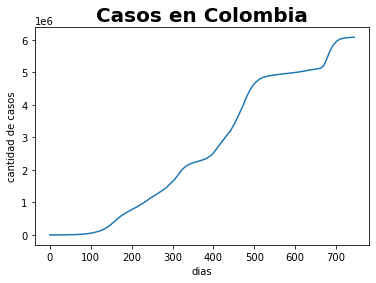

In [35]:
#seleccionamos Colombia

ind_co=np.where(paises=='Colombia')
ind_co=ind_co[0]
casos_co=confirmados[ind_co]
dias=np.arange(0,len(casos_co))
plt.plot(dias,casos_co)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Colombia' , fontweight = 'black', fontsize=20);

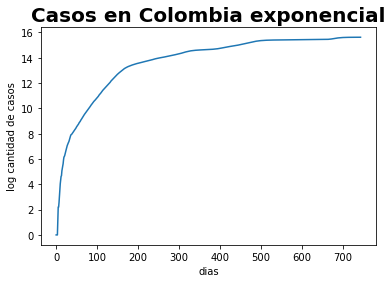

In [36]:
plt.plot(dias,np.log(casos_co))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Colombia exponencial' , fontweight = 'black', fontsize=20);

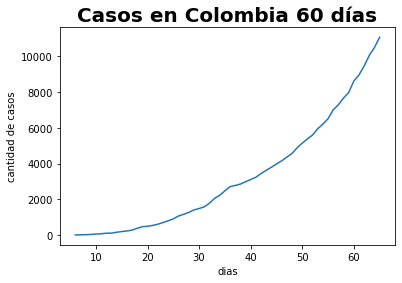

In [37]:
casos_principio=casos_co[6:66]
dias_principio=dias[6:66]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Colombia 60 días' , fontweight = 'black', fontsize=20);

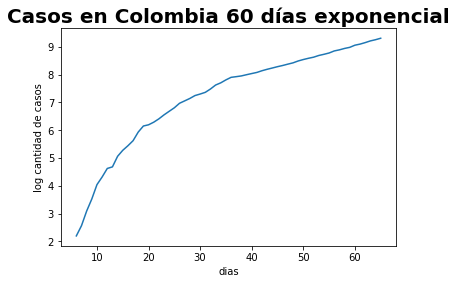

In [38]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Colombia 60 días exponencial' , fontweight = 'black', fontsize=20);

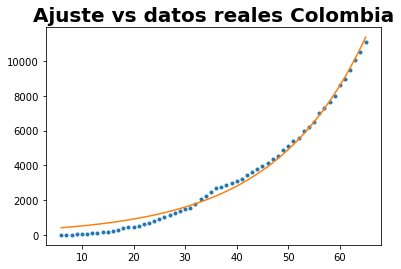

In [39]:
#ajustamos Colombia
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Colombia' , fontweight = 'black', fontsize=20);

In [40]:
t0_Colombia = dias_principio[0]
t_Colombia = dias_principio[-1]
k_Colombia = k

dic_Colombia = {'Pais':'Colombia', 't0': [t0_Colombia],'t': [t_Colombia],'k':[k_Colombia]}
df_Colombia = pd.DataFrame(data=dic_Colombia)
df_Colombia

,Pais,t0,t,k
0,Colombia,6,65,0.055845


## Rusia


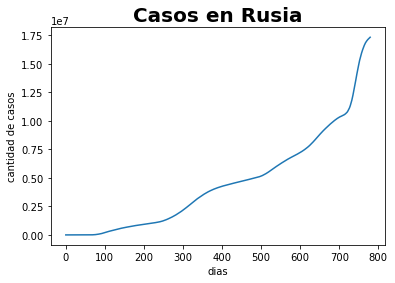

In [41]:
#seleccionamos Rusia

ind_rs=np.where(paises=='Russia')
ind_rs=ind_rs[0]
casos_rs=confirmados[ind_rs]
dias=np.arange(0,len(casos_rs))
plt.plot(dias,casos_rs)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Rusia' , fontweight = 'black', fontsize=20);

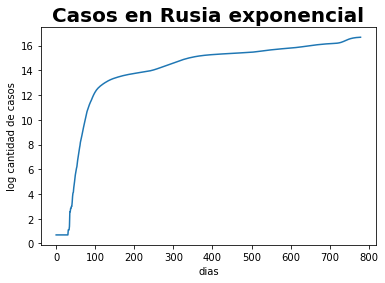

In [42]:
plt.plot(dias,np.log(casos_rs))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Rusia exponencial' , fontweight = 'black', fontsize=20);

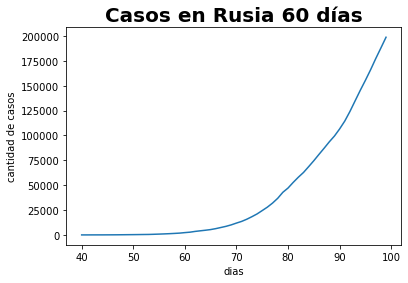

In [43]:
casos_principio=casos_rs[40:100]
dias_principio=dias[40:100]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Rusia 60 días' , fontweight = 'black', fontsize=20);

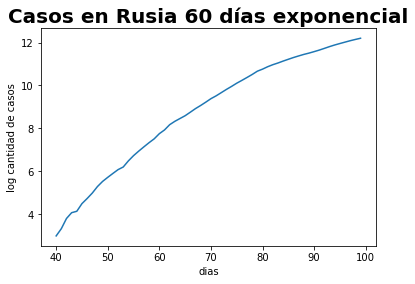

In [44]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Rusia 60 días exponencial' , fontweight = 'black', fontsize=20);

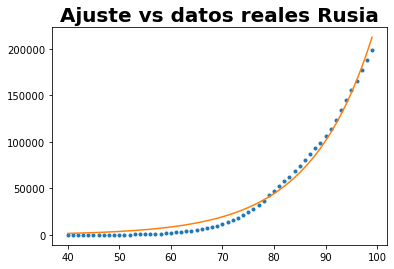

In [45]:
#ajustamos Rusia
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Rusia' , fontweight = 'black', fontsize=20);

In [46]:
t0_Rusia = dias_principio[0]
t_Rusia = dias_principio[-1]
k_Rusia = k

dic_Rusia = {'Pais':'Rusia', 't0': [t0_Rusia],'t': [t_Rusia],'k':[k_Rusia]}
df_Rusia = pd.DataFrame(data=dic_Rusia)
df_Rusia

,Pais,t0,t,k
0,Rusia,40,99,0.08236


## Nigeria


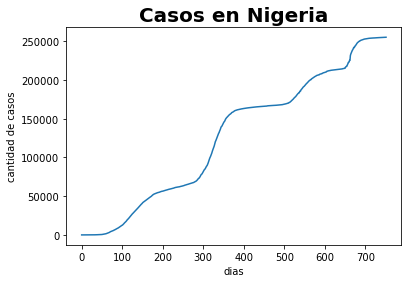

In [47]:
#seleccionamos Nigeria

ind_ng=np.where(paises=='Nigeria')
ind_ng=ind_ng[0]
casos_ng=confirmados[ind_ng]
dias=np.arange(0,len(casos_ng))
plt.plot(dias,casos_ng)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Nigeria' , fontweight = 'black', fontsize=20);

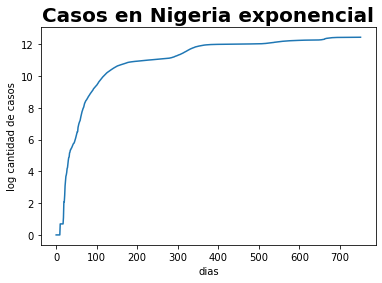

In [48]:
plt.plot(dias,np.log(casos_ng))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Nigeria exponencial' , fontweight = 'black', fontsize=20);

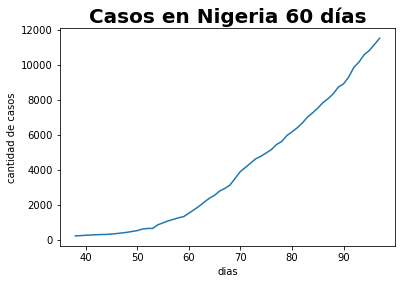

In [49]:
casos_principio=casos_ng[38:98]
dias_principio=dias[38:98]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Nigeria 60 días' , fontweight = 'black', fontsize=20);

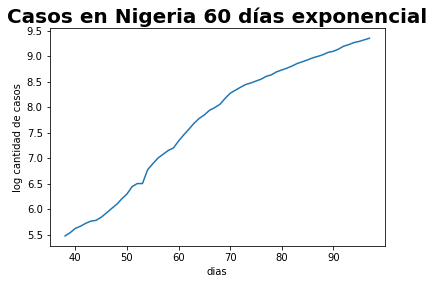

In [50]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Nigeria 60 días exponencial' , fontweight = 'black', fontsize=20);

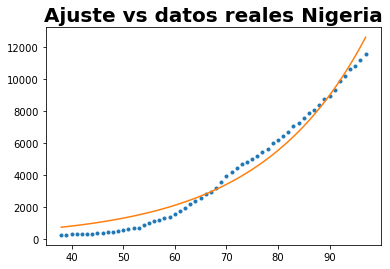

In [51]:
#ajustamos Nigeria
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Nigeria' , fontweight = 'black', fontsize=20);

In [52]:
t0_Nigeria = dias_principio[0]
t_Nigeria = dias_principio[-1]
k_Nigeria = k

dic_Nigeria = {'Pais':'Nigeria', 't0': [t0_Nigeria],'t': [t_Nigeria],'k':[k_Nigeria]}
df_Nigeria = pd.DataFrame(data=dic_Nigeria)
df_Nigeria

,Pais,t0,t,k
0,Nigeria,38,97,0.048533


## Brasil


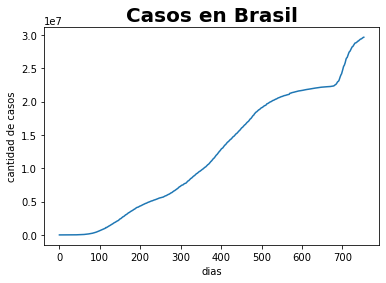

In [53]:
#seleccionamos Brasil

ind_br=np.where(paises=='Brazil')
ind_br=ind_br[0]
casos_br=confirmados[ind_br]
dias=np.arange(0,len(casos_br))
plt.plot(dias,casos_br)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Brasil' , fontweight = 'black', fontsize=20);

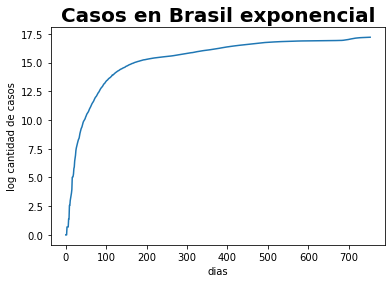

In [54]:
plt.plot(dias,np.log(casos_br))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Brasil exponencial' , fontweight = 'black', fontsize=20);

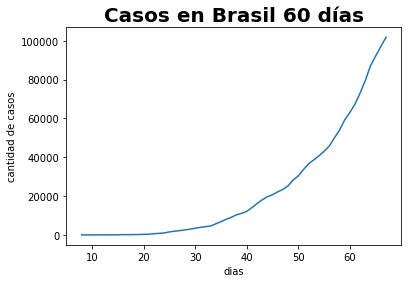

In [55]:
casos_principio=casos_br[8:68]
dias_principio=dias[8:68]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Brasil 60 días' , fontweight = 'black', fontsize=20);

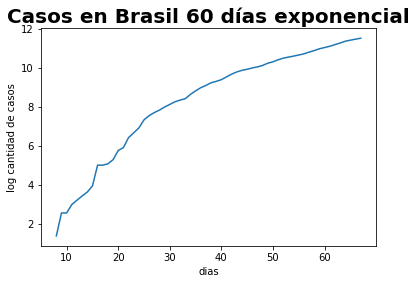

In [56]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Brasil 60 días exponencial' , fontweight = 'black', fontsize=20);

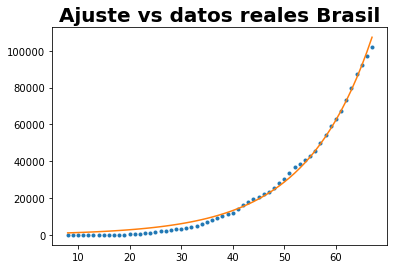

In [57]:
#ajustamos Brasil
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Brasil' , fontweight = 'black', fontsize=20);

In [58]:
t0_Brasil = dias_principio[0]
t_Brasil = dias_principio[-1]
k_Brasil = k

dic_Brasil = {'Pais':'Brasil', 't0': [t0_Brasil],'t': [t_Brasil],'k':[k_Brasil]}
df_Brasil = pd.DataFrame(data=dic_Brasil)
df_Brasil

,Pais,t0,t,k
0,Brasil,8,67,0.077515


## Belgica


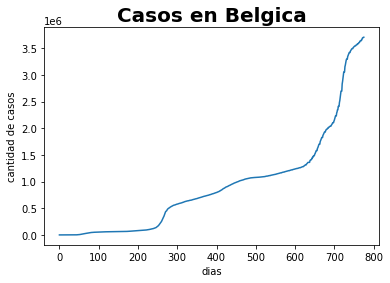

In [59]:
#seleccionamos Belgica

ind_bl=np.where(paises=='Belgium')
ind_bl=ind_bl[0]
casos_bl=confirmados[ind_bl]
dias=np.arange(0,len(casos_bl))
plt.plot(dias,casos_bl)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Belgica' , fontweight = 'black', fontsize=20);

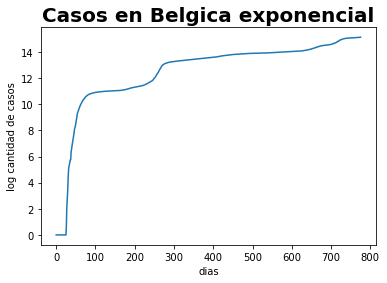

In [60]:
plt.plot(dias,np.log(casos_bl))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Belgica exponencial' , fontweight = 'black', fontsize=20);

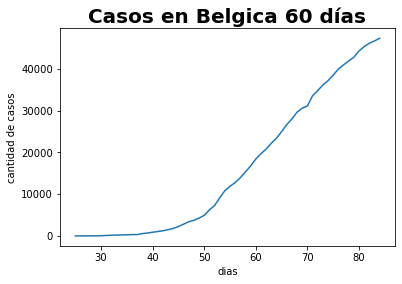

In [61]:
casos_principio=casos_bl[25:85]
dias_principio=dias[25:85]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Belgica 60 días' , fontweight = 'black', fontsize=20);

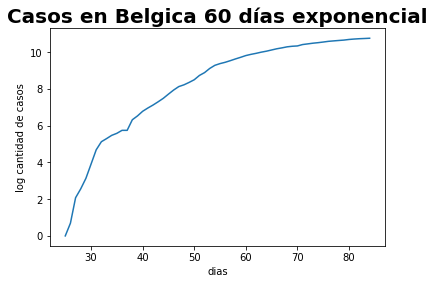

In [62]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Belgica 60 días exponencial' , fontweight = 'black', fontsize=20);

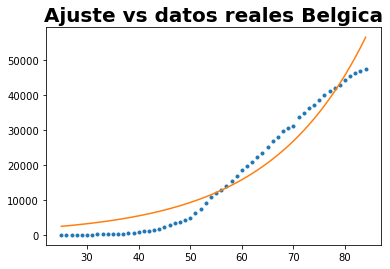

In [63]:
#ajustamos Belgica
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Belgica' , fontweight = 'black', fontsize=20);

In [64]:
t0_Belgica = dias_principio[0]
t_Belgica = dias_principio[-1]
k_Belgica = k

dic_Belgica = {'Pais':'Belgica', 't0': [t0_Belgica],'t': [t_Belgica],'k':[k_Belgica]}
df_Belgica = pd.DataFrame(data=dic_Belgica)
df_Belgica

,Pais,t0,t,k
0,Belgica,25,84,0.053143


## Israel


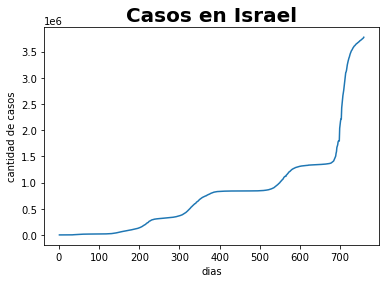

In [65]:
#seleccionamos Israel

ind_ir=np.where(paises=='Israel')
ind_ir=ind_ir[0]
casos_ir=confirmados[ind_ir]
dias=np.arange(0,len(casos_ir))
plt.plot(dias,casos_ir)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Israel' , fontweight = 'black', fontsize=20);

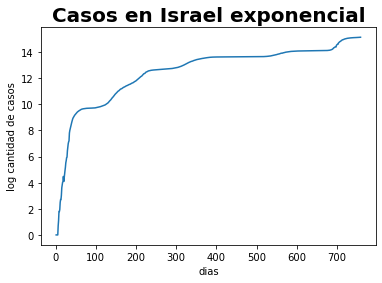

In [66]:
plt.plot(dias,np.log(casos_ir))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Israel exponencial' , fontweight = 'black', fontsize=20);

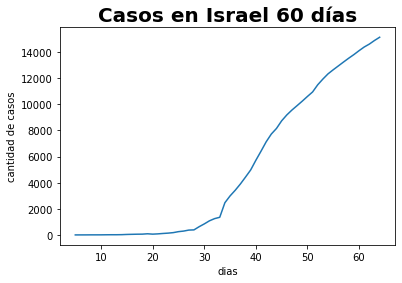

In [67]:
casos_principio=casos_ir[5:65]
dias_principio=dias[5:65]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en Israel 60 días' , fontweight = 'black', fontsize=20);

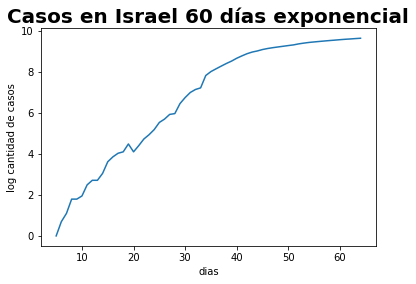

In [68]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en Israel 60 días exponencial' , fontweight = 'black', fontsize=20);

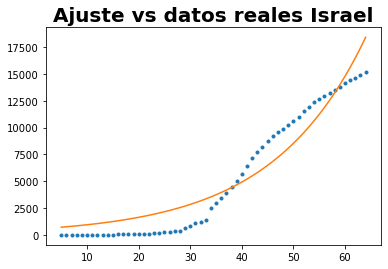

In [69]:
#ajustamos Israel
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Israel' , fontweight = 'black', fontsize=20);

In [70]:
t0_Israel = dias_principio[0]
t_Israel = dias_principio[-1]
k_Israel = k

dic_Israel = {'Pais':'Israel', 't0': [t0_Israel],'t': [t_Israel],'k':[k_Israel]}
df_Israel = pd.DataFrame(data=dic_Israel)
df_Israel

,Pais,t0,t,k
0,Israel,5,64,0.054939


## Analísis

Para este apartado se estudía si las k de los 10 paises seleccionados anteriormente, pueden describir el comportamiento de la pandemia para el resto del mundo, para esto se emplean intervalos de confianza para determinar la evolución de lapandemia

In [71]:
#Metrícas
result=pd.concat([df_Argentina,df_Canada,df_Japon,df_Portugal,df_Colombia,df_Rusia,df_Nigeria,df_Brasil,df_Belgica,
                 df_Israel],ignore_index = True)
result

,Pais,t0,t,k
0,Argentina,70,89,0.167940
1,Canada,0,59,0.223013
2,Japon,10,69,0.067459
3,Portugal,20,79,0.024021
4,Colombia,6,65,0.055845
5,Rusia,40,99,0.082360
6,Nigeria,38,97,0.048533
7,Brasil,8,67,0.077515
8,Belgica,25,84,0.053143
9,Israel,5,64,0.054939


In [72]:
# Resultados de las k de los paises estudiados
k_result = result['k']
k_result

0    0.167940
1    0.223013
2    0.067459
3    0.024021
4    0.055845
5    0.082360
6    0.048533
7    0.077515
8    0.053143
9    0.054939
Name: k, dtype: float64

k promedio :
0.0854767693542682
k mediana :
0.06165191076303299
k desviación estandar :
0.06156462386225665


C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


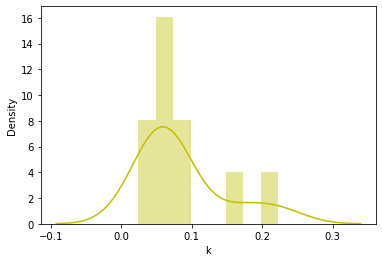

In [73]:
print('k promedio :\n',k_result.mean(), sep = "")
print('k mediana :\n',k_result.median(), sep = "")
print('k desviación estandar :\n',k_result.std(), sep = "")

import seaborn as sns
sns.distplot(k_result, color ="y");

In [74]:
# bootstrap

def bootstrap_simplificado(df, N=100):
    boots = list()
    for _ in range(N):
        boots.append(np.random.choice(df,size=len(df)))
    return np.array(boots)

In [75]:
df_boots = bootstrap_simplificado(k_result, 1000)

In [76]:
alpha = 1

In [77]:
medias = np.apply_along_axis(func1d=np.mean, axis=1, arr=df_boots)
medias.sort()

In [78]:
k_f = medias.mean()
k_f

0.08532672282449098

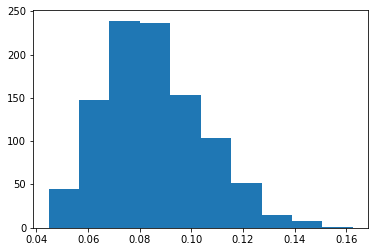

In [79]:
plt.hist(medias);

In [80]:
limit_inferior = np.percentile(medias, alpha/2)
limit_superior = np.percentile(medias, (100-alpha/2))
ic = [limit_inferior, limit_superior]
ic

[0.049178002159895685, 0.1413380328887652]

Con un 95% de confianza, se puede decir que la k promedio se encuentra entre [0.04544859993743008, 0.1412228928210926]

## Población Mundial


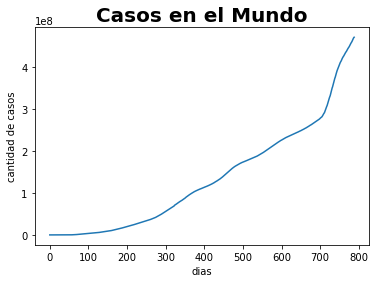

In [81]:
#seleccionamos mundo

ind_wl=np.where(paises=='World')
ind_wl=ind_wl[0]
casos_wl=confirmados[ind_wl]
dias=np.arange(0,len(casos_wl))
plt.plot(dias,casos_wl)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en el Mundo' , fontweight = 'black', fontsize=20);

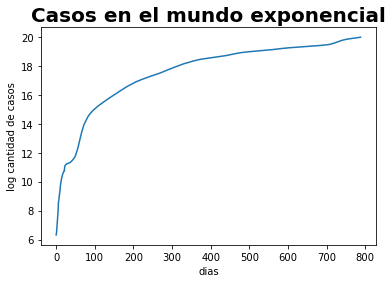

In [82]:
plt.plot(dias,np.log(casos_wl))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en el mundo exponencial' , fontweight = 'black', fontsize=20);

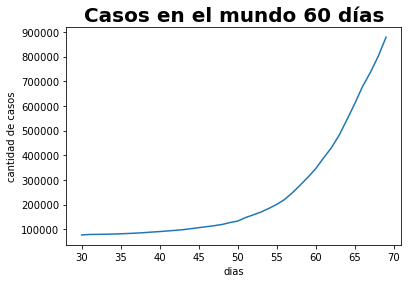

In [83]:
casos_principio=casos_wl[30:70]
dias_principio=dias[30:70]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos en el mundo 60 días' , fontweight = 'black', fontsize=20);

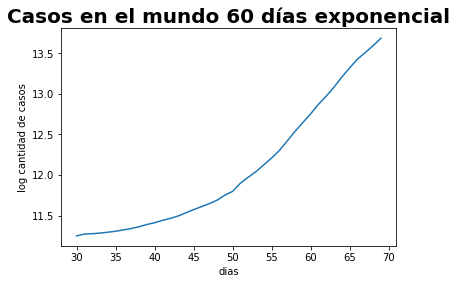

In [84]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Casos en el mundo 60 días exponencial' , fontweight = 'black', fontsize=20);

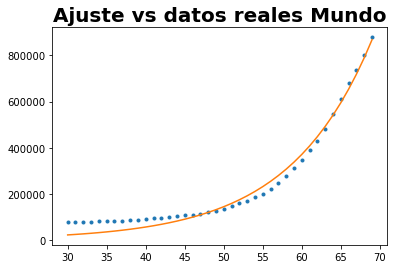

In [85]:
#ajustamos la k con respecto a los datos reales
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Mundo' , fontweight = 'black', fontsize=20);

In [86]:
#k mundo
k 

0.09450519157568535

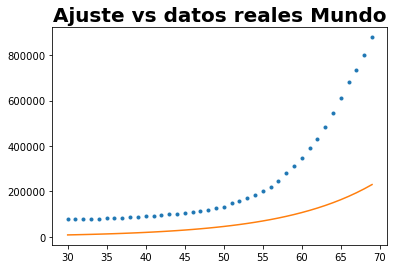

In [87]:
#comparación con respecto a la k de los 10 paises seleccionados
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k_f,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.title('Ajuste vs datos reales Mundo' , fontweight = 'black', fontsize=20);

In [88]:
k_f

0.08532672282449098

Si se compara la K del mundo con respecto a la de los paises que se selecciono, se puede decir en terminos epidemiologícos que en el mundo el covid fue mas duro que en los paises que se tomaron, esto quiere decir que en el mundo hubo mas contagíos y propagación.

In [89]:
#RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(casos_principio,casos_simu)
print(np.format_float_scientific(rmse,precision = 1,exp_digits=3))

5.8e+010


## Conclusión

* Con base en en el resultado tan grande que arrojo el RMSE del modelo que se planteo, se puede concluir que es muy complejo desarrollar un modelo que permita aproximar la k de algunos paises y con la k mundial para predecir correctamente nuevos contagios, ya que el comportamiento del virus no es igual en todos los paises, aunque el virus es el mismo, la propagación de este varia dependiendo el país.

* Para predecir la cantidad de contagios es importante tener en cuenta que la población sobre la cual se va a predecir debe ser estudiada bajo condiciones iguales, teniendo encuenta las politícas y estrategias empleadas por los paises. Ademas, que las medidas sanitarias empleadas sean iguales o como minimo similares y en los mismos periodos de tiempo.

# Evaluación de estrategia


En este apartado se emplea como estrategia el clasificador si el país implemento algun plan de vacunación en un rango de fecha estiplulado, por ejemplo la comisión europea lanzo el programa de vacunación el 26 de diciembre de año 2020 inciando con paises como Alemania, Hungría y Eslovaquia, donde España comenzó a distribuir la vacuna el 27 de diciembre. Por esto, se evalua la estrategia en apartir del 26/12/2020 para dichos paises y francia hasta el 23 de febrero del 2021, fecha en la que paises de América como Uruguay, Honduras, Guatemala, Nicaragua y Cuba, hasta ese periodo no habian empezado a vacunar. Ademas, el plan de vacunación en la región de América fue más lento que en países con más recursos como los de la Unión Europea.

Los indicadores que se tienen en cuenta para evaluar la estrategia son los casos nuevos,los pacientes en uci y las cantidad de nuevas muertes, estas son variables que permiten identificar la efectividad de la implementación de la estrategia, y el estado de evolución del virus, dado que al implementar el plan de vacunación estos indicadores deberian de reducir, ya que las personas vacunadas adquieren anticuerpos que permiten cotrarestar los sintomas del virus y su letalidad.

Referencias: 
**https://www.bbc.com/mundo/noticias-america-latina-56168826

**https://www.france24.com/es/programas/ciencia-y-tecnolog%C3%ADa/20201210-covid-19-estos-son-los-pa%C3%ADses-que-ya-iniciaron-la-vacunaci%C3%B3n-masiva

**https://www.dw.com/es/europa-inicia-campa%C3%B1a-de-vacunaci%C3%B3n-contra-el-covid-19/a-56065819

**https://www.bbc.com/mundo/noticias-internacional-55605860

In [90]:
#Se copia el dataset
estrategia = datos.copy()
estrategia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [91]:
# Formato fecha
estrategia['fecha'] = pd.to_datetime(estrategia.date)
estrategia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,fecha
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-24
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-25
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-26
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-27
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169934,ZWE,Africa,Zimbabwe,2022-03-16,243650.0,741.0,472.429,5418.0,2.0,2.571,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-03-16
169935,ZWE,Africa,Zimbabwe,2022-03-17,243650.0,0.0,300.286,5418.0,0.0,1.429,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-03-17
169936,ZWE,Africa,Zimbabwe,2022-03-18,244012.0,362.0,352.000,5420.0,2.0,1.714,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-03-18
169937,ZWE,Africa,Zimbabwe,2022-03-19,244452.0,440.0,340.429,5426.0,6.0,2.000,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-03-19


In [92]:
# Filtrar fechas a evaluar
estrategia1 = estrategia[(estrategia.fecha >='2020-12-26') & (estrategia.fecha<='2021-02-23')]
estrategia1 = estrategia1[(estrategia1.location =='Germany')  | (estrategia1.location =='Hungary') | (estrategia1.location =='Slovakia') |(estrategia1.location =='Spain') | (estrategia1.location =='France') | (estrategia1.location =='Uruguay') |(estrategia1.location =='Honduras') | (estrategia1.location =='Guatemala') | (estrategia1.location =='Nicaragua') |(estrategia1.location =='Cuba')]
estrategia1.shape

(600, 68)

In [93]:
 # Indicadores
est = estrategia1[["new_cases", "new_deaths","icu_patients","location","people_vaccinated"]]
est

,new_cases,new_deaths,icu_patients,location,people_vaccinated
37966,138.0,1.0,NaN,Cuba,NaN
37967,167.0,1.0,NaN,Cuba,NaN
37968,229.0,1.0,NaN,Cuba,NaN
37969,167.0,0.0,NaN,Cuba,NaN
37970,86.0,2.0,NaN,Cuba,NaN
...,...,...,...,...,...
162561,625.0,5.0,NaN,Uruguay,NaN
162562,786.0,6.0,NaN,Uruguay,NaN
162563,652.0,5.0,NaN,Uruguay,NaN
162564,495.0,9.0,NaN,Uruguay,NaN


In [94]:
# Resultados de los pasises que aplicaron la estrategia durante los 59 días evaluados
g = est.groupby('location').sum().sort_values(by="new_cases",ascending=False)
g

,new_cases,new_deaths,icu_patients,people_vaccinated
location,,,,
Spain,1306481.0,18255.0,212220.0,41621592.0
France,1083042.0,22617.0,179189.0,73162602.0
Germany,772527.0,39205.0,273336.0,97451369.0
Slovakia,317251.0,4939.0,20197.0,1338579.0
Hungary,93110.0,5617.0,0.0,10018625.0
Honduras,47888.0,979.0,0.0,0.0
Uruguay,38125.0,445.0,0.0,0.0
Guatemala,36992.0,1558.0,0.0,0.0
Cuba,35297.0,164.0,0.0,0.0


''

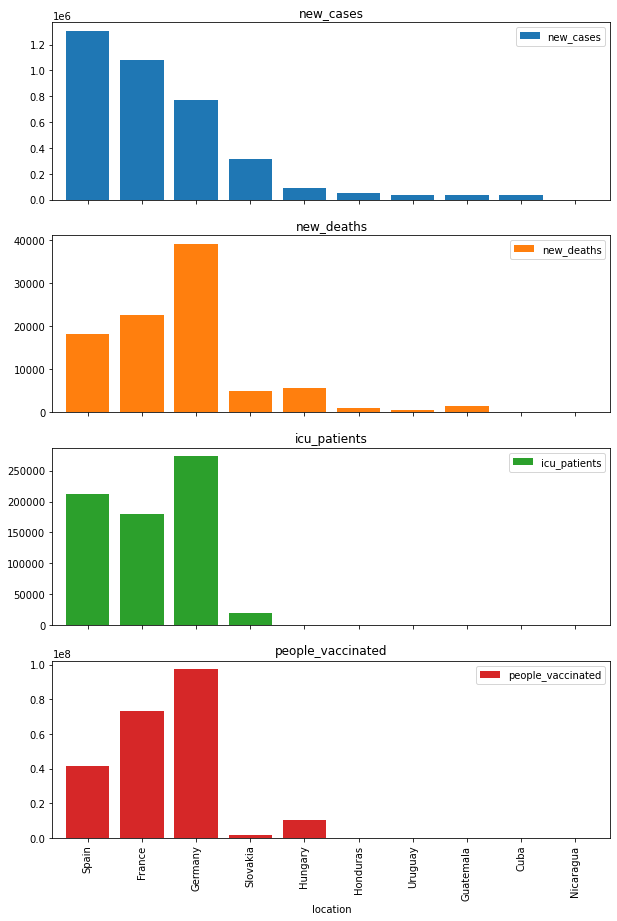

In [95]:
# Indicadores
g.plot(kind = 'bar',
             width=0.8,
             subplots=True,
             figsize=(10,15))
;

A continuación se comparan estos indicadores con un rango de fechas de 59 días en los que aquellos paises que ya implementaron la vacunacuón, aun no lo habían hecho, esto con el fin de evaluar la estrategia en cuanto a disminución de los casos y la cantidad de personas fallecidas, así como si la tasa de reproducción era mayor

In [96]:
# Filtrar fechas a comparar
estrategia_c = estrategia[(estrategia.fecha >='2020-10-17') & (estrategia.fecha<='2020-12-15')]
estrategia_c = estrategia_c[(estrategia_c.location =='Germany')  | (estrategia_c.location =='Hungary') | (estrategia_c.location =='Slovakia') |(estrategia_c.location =='Spain') | (estrategia_c.location =='France') | (estrategia_c.location =='Uruguay') |(estrategia_c.location =='Honduras') | (estrategia_c.location =='Guatemala') | (estrategia_c.location =='Nicaragua') |(estrategia_c.location =='Cuba')]
estrategia_c.shape

(600, 68)

In [97]:
 # Indicadores comparación
est_c = estrategia_c[["new_cases", "new_deaths","icu_patients","location","people_vaccinated"]]
est_c

,new_cases,new_deaths,icu_patients,location,people_vaccinated
37896,52.0,1.0,NaN,Cuba,NaN
37897,50.0,0.0,NaN,Cuba,NaN
37898,38.0,2.0,NaN,Cuba,NaN
37899,47.0,0.0,NaN,Cuba,NaN
37900,63.0,0.0,NaN,Cuba,NaN
...,...,...,...,...,...
162491,362.0,0.0,NaN,Uruguay,NaN
162492,331.0,1.0,NaN,Uruguay,NaN
162493,528.0,1.0,NaN,Uruguay,NaN
162494,321.0,3.0,NaN,Uruguay,NaN


In [98]:
# Resultados de los pasises que aplicaron la estrategia durante los 59 días evaluados, en fechas en las que no lo habian aplicado
g_c = est_c.groupby('location').sum().sort_values(by="new_cases",ascending=False)
g_c

,new_cases,new_deaths,icu_patients,people_vaccinated
location,,,,
France,1603321.0,25829.0,216664.0,0.0
Germany,1031284.0,13771.0,181164.0,0.0
Spain,825652.0,14626.0,153283.0,0.0
Hungary,242738.0,6152.0,0.0,0.0
Slovakia,149826.0,1180.0,8262.0,0.0
Guatemala,29651.0,998.0,0.0,0.0
Honduras,28252.0,445.0,0.0,0.0
Uruguay,7968.0,47.0,0.0,0.0
Cuba,3470.0,13.0,0.0,0.0


In [99]:
print(g)
print(g_c)

           new_cases  new_deaths  icu_patients  people_vaccinated
location                                                         
Spain      1306481.0     18255.0      212220.0         41621592.0
France     1083042.0     22617.0      179189.0         73162602.0
Germany     772527.0     39205.0      273336.0         97451369.0
Slovakia    317251.0      4939.0       20197.0          1338579.0
Hungary      93110.0      5617.0           0.0         10018625.0
Honduras     47888.0       979.0           0.0                0.0
Uruguay      38125.0       445.0           0.0                0.0
Guatemala    36992.0      1558.0           0.0                0.0
Cuba         35297.0       164.0           0.0                0.0
Nicaragua      454.0         9.0           0.0                0.0
           new_cases  new_deaths  icu_patients  people_vaccinated
location                                                         
France     1603321.0     25829.0      216664.0                0.0
Germany   

* Al evaluar los primeros 59 días desde que se implemento la estrategia del plan de vacunación, se puede ver que los paises como Alemania y Fracia que son los que mas personas habian vacunado y primero  iniciaron a vacunar al igual que Hungría en esos 59 días de vacunación la cantidad de casos nuevos disminuyo con respecto al periodo en el cual no se había iniciado con el plan de vacunación, de esta misma forma, la cantidad de nuevas muertes y los pacientes en unidad de cuidados intensivos disminuye. Cabe resaltar que la estrategia de vacunación en los primeros dos meses de la estrategia no se comporta de la misma manera para España y Slovakia, ya que para españa en dicha epoca aunque se inicio a vacunar la cantidad de nuevos casos aumento, así como las nuevas muertes y los pacientes en uci. Para Slovakia, el unico indicador que mejora son la cantidad de nuevas muertes, que disminuyeron con respecto al periodo anterior. 

* La implementación del plan de vacunación en todos los paises no se comporta de la misma manera, ya que este depende de la cantidad de vacunas compradas por cada nación, la distribución de las mismas, el cronograma para implementación en cuanto a dosis y refuerzos. Ademas, se debe tener en cuenta hay personas que se oponen a vacunarse y en algunos paises no es obligatorio tener las dosis.

* ¿Como es el comportan los paises no vacunados en cuanto a los nuevos casos y nuevas muertes ? 

   R/ Los paises no vacunados se ven mas afectados, esto se debe a que el comportamiento de la pandemia los en       paises de ámerica fue más tardio. Ademas, la fechas en las que se inicio la vacunación en europa fue a         finales del año 2020 e inicios del 2021, epoca donde se aumentaron los casos en algunos paises de             ámerica y con la dificultad de estos paises para adquirir y comprar dosis para implementar el plan de         vacunación 
   

* Referencias:

https://www.bbc.com/mundo/noticias-55911364

https://news.un.org/es/story/2021/10/1498032

## Clasificación

En este apartado se construye un clasificador binario a partir de una regresión logística para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de el clasificador

In [100]:
est

,new_cases,new_deaths,icu_patients,location,people_vaccinated
37966,138.0,1.0,NaN,Cuba,NaN
37967,167.0,1.0,NaN,Cuba,NaN
37968,229.0,1.0,NaN,Cuba,NaN
37969,167.0,0.0,NaN,Cuba,NaN
37970,86.0,2.0,NaN,Cuba,NaN
...,...,...,...,...,...
162561,625.0,5.0,NaN,Uruguay,NaN
162562,786.0,6.0,NaN,Uruguay,NaN
162563,652.0,5.0,NaN,Uruguay,NaN
162564,495.0,9.0,NaN,Uruguay,NaN


In [101]:
#Se codifican las categorias de la variable objetivo
est["vaccinated"]=est["location"].replace({"Germany": 1,"France": 1,"Spain": 1,"Hungary": 1,"Slovakia": 1, 
                                      "Uruguay": 0,"Honduras": 0,"Guatemala": 0,"Nicaragua": 0,"Cuba": 0})
est

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,new_cases,new_deaths,icu_patients,location,people_vaccinated,vaccinated
37966,138.0,1.0,NaN,Cuba,NaN,0
37967,167.0,1.0,NaN,Cuba,NaN,0
37968,229.0,1.0,NaN,Cuba,NaN,0
37969,167.0,0.0,NaN,Cuba,NaN,0
37970,86.0,2.0,NaN,Cuba,NaN,0
...,...,...,...,...,...,...
162561,625.0,5.0,NaN,Uruguay,NaN,0
162562,786.0,6.0,NaN,Uruguay,NaN,0
162563,652.0,5.0,NaN,Uruguay,NaN,0
162564,495.0,9.0,NaN,Uruguay,NaN,0


In [102]:
print("Cantidad de valores faltantes por columna:\n", est.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
new_cases              0
new_deaths             0
icu_patients         360
location               0
people_vaccinated    400
vaccinated             0
dtype: int64


La variable de los pacientes en uci, donde aparecen valores faltantes se va a rellenar con 0, esto debidp a que puede ser que en esas fechas no ubieron pacientes que llegaron a tal complicación.

In [103]:
# Llenar los datos faltantes con 0
est.fillna(value=0,inplace=True) # llenar los espacios con un numero

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [104]:
print("Cantidad de valores faltantes por columna:\n", est.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
new_cases            0
new_deaths           0
icu_patients         0
location             0
people_vaccinated    0
vaccinated           0
dtype: int64


In [105]:
# Importar librerias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

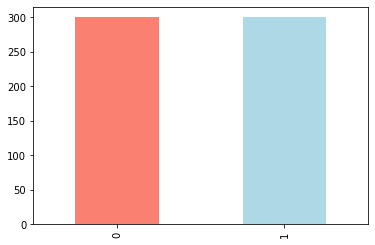

In [106]:
# Plot variable de interes
est.vaccinated.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Se puede ver que la variable objetivo esta balanceada, por tal motivo no se tiene problemas de prevalencia.

In [107]:
# División de variables predictoras y variable a predecir
X = est[["new_cases", "new_deaths","icu_patients"]]

y = est.vaccinated

In [108]:
#Train y test split con 80% de entrenamiento y 20% para evaluación porque se tienen pocos datos
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [109]:
# Modelo regresión logistica
rl = LogisticRegression()


In [110]:
rl.fit(X_train, y_train)

LogisticRegression()

In [111]:
rl.score(X_test, y_test)

0.9833333333333333

In [112]:
# Predicción con los datos de evaluación
y_preds = rl.predict(X_test)
y_preds

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

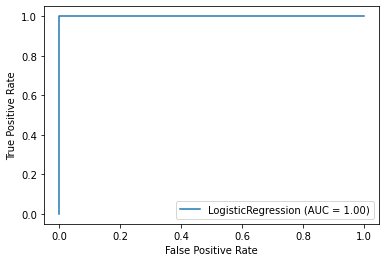

In [113]:
# Importar curva ROC
from sklearn.metrics import plot_roc_curve

# Plot
plot_roc_curve(rl, X_test, y_test);

La curva ROC permite entender el rendimiento del modelo, donde compara la tasa de verdaderos positivos con la tasa de falsos positivos. Podemos ver que el modelo tiene un buen rendimiento y se puede decir que es un modelo casi perfecto.

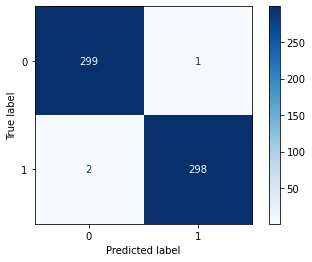

In [114]:
#matrix de confusion
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rl, X, y, cmap=plt.cm.Blues, values_format = '.0f');

In [115]:
# Reporte de clasificación 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.97      0.98        65

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



* Precisión - Indica la proporción de identificaciones positivas (clase 1 predicha por el modelo) que fueron realmente correctas.

* Recall - Indica la proporción de positivos reales que fueron clasificados correctamente.

* Puntuación F1: combinación de precisión y recuperación. Un modelo perfecto alcanza una puntuación F1 de 1,0.

* Soporte - El número de muestras sobre las que se ha calculado cada métrica.

Se puede ver que el modelo perdice bien cuando se esta haciendo cuarentena y cuando no, acontinuación se hacen predicciones con paises dintintos a los del conjunto de envaluación, esto con el fin de ver como predice el modelo, si solamente es bueno con este conjunto de datos.

In [116]:
# Filtrar fechas a evaluar
prueba = estrategia[(estrategia.fecha >='2020-12-26') & (estrategia.fecha<='2021-02-23')]
prueba = prueba[(prueba.location =='Belgium')  | (prueba.location =='Bolivia') | (prueba.location =='Portugal') |(prueba.location =='Mexico') | (prueba.location =='Venezuela') | (prueba.location =='Zambia') |(prueba.location =='Italy') | (prueba.location =='Israel') | (prueba.location =='Jamaica') |(prueba.location =='Japan')]
prueba.shape

(600, 68)

In [117]:
prueba_p = prueba[["new_cases", "new_deaths","icu_patients"]]
print("Cantidad de valores faltantes por columna:\n", prueba_p.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
new_cases         0
new_deaths        0
icu_patients    352
dtype: int64


In [118]:
# Llenar los datos faltantes con 0
prueba_p.fillna(value=0,inplace=True)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [119]:
probabilidad = rl.predict_proba(prueba_p)
probabilidad

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 3.78631631e-10],
       [9.99999994e-01, 6.32918380e-09],
       [9.99999997e-01, 2.86050573e-09]])

In [120]:
forest = rl.predict(prueba_p)
forest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [121]:
prueba1 = prueba.copy()
prueba1.fillna(value=0,inplace=True)
prueba1= prueba1[["new_cases", "new_deaths","icu_patients","location"]]
prueba1

,new_cases,new_deaths,icu_patients,location
15424,784.0,69.0,493.0,Belgium
15425,847.0,42.0,491.0,Belgium
15426,857.0,34.0,510.0,Belgium
15427,1677.0,127.0,498.0,Belgium
15428,2831.0,80.0,496.0,Belgium
...,...,...,...,...
168813,736.0,11.0,0.0,Zambia
168814,691.0,14.0,0.0,Zambia
168815,609.0,4.0,0.0,Zambia
168816,524.0,11.0,0.0,Zambia


In [122]:
prueba1['prediccion_model'] = forest
#prueba1['probabilidad'] = probabilidad

prueba1

,new_cases,new_deaths,icu_patients,location,prediccion_model
15424,784.0,69.0,493.0,Belgium,1
15425,847.0,42.0,491.0,Belgium,1
15426,857.0,34.0,510.0,Belgium,1
15427,1677.0,127.0,498.0,Belgium,1
15428,2831.0,80.0,496.0,Belgium,1
...,...,...,...,...,...
168813,736.0,11.0,0.0,Zambia,0
168814,691.0,14.0,0.0,Zambia,0
168815,609.0,4.0,0.0,Zambia,0
168816,524.0,11.0,0.0,Zambia,0


In [123]:
prueba1.pivot_table('new_cases', index='location', columns='prediccion_model')

prediccion_model,0,1
location,,
Belgium,NaN,2007.500000
Bolivia,1326.650000,1886.200000
Israel,NaN,6086.350000
Italy,NaN,13396.800000
Jamaica,153.816667,NaN
Japan,2102.250000,3651.267857
Mexico,0.000000,11525.813559
Portugal,NaN,6788.733333
Venezuela,423.050000,NaN


El modelo esta prediciendo bien en cientos casos, Belgica,Israel,Italia,Portugal que son paises que durante las fechas que se filtro, ya habían iniciado el plan de vacunación, el modelo los marco bien, como que ya habían implementado dicha estrategia, tambiés predice predice bien con paises como Jamaica,Venezuela,Zambia los esta prediciendo como que no habian implementado la estrategia en dicho rango de tiempo y efectivamente es así. Pero esta fallando en paises como Bolivia,Japan,Mexico que deberian estar con la marca con que en esas fechas ya habían implementado esa estrategia y los esta marcado en ambas partes en algunas que si y otras que no.

Esto también se debe a que dentro de un mismo país, el compartamiento de las ciudades en cuanto a la pandemia varia, lo que hace que en algunos periodos hayan territorios en los cuales no se inicio tardia la implementación de dicha estrategia.

In [124]:
#Coeficientes
rl.coef_

array([[0.00156416, 0.42133094, 0.14707103]])

In [125]:
# Caracteristicas
caracteristicas = dict(zip(X.columns, list(rl.coef_[0])))
caracteristicas

{'new_cases': 0.0015641620893569988,
 'new_deaths': 0.42133093794586457,
 'icu_patients': 0.14707103284786263}

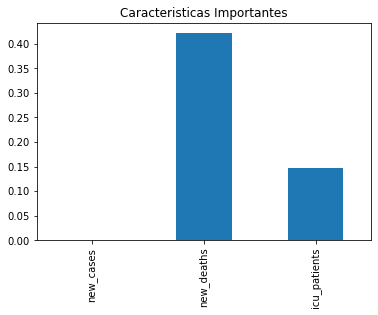

In [126]:
# Visualización caracteristicas
ca = pd.DataFrame(caracteristicas, index=[0])
ca.T.plot.bar(title="Caracteristicas Importantes", legend=False);

* La caracteristica mas importante para el modelo es la cantidad de nuevas muertes con un 47% de importancia, esto se debe a que la vacunación previene la letalidad del virus que puede llegar a la muerte, por esta es la variable mas importante ya que una persona vacunada se puede contagiar, pero reduce el riego de muerte o de tener una enfermedad grave que lleve a la persona a uci, que es la segunda variable mas importante con un 16%


* "Las personas totalmente vacunadas que se infectan tienen menos probabilidades de desarrollar enfermedades graves que aquellas que no están vacunadas.Incluso cuando las personas totalmente vacunadas presentan síntomas, estos tienden a ser más leves que en las personas no vacunadas. Esto significa que tienen muchas menos probabilidades de morir o ser hospitalizadas que quienes no están vacunados"


* Referencias: 

https://espanol.cdc.gov/coronavirus/2019-ncov/vaccines/effectiveness/why-measure-effectiveness/breakthrough-cases.html

https://www.minsalud.gov.co/Paginas/La-vacuna-de-Sinovac-nos-permitio-reducir-letalidad-Minsalud.aspx

# Informe


El presente informe se presentan los principales insight y caracteristicas basicas sobre la pandemia covid-19 y como esta repercute en cunto a la cantidad de contagiados así como los decesos y sintomas graves que conllevan a la hospitalización, estos son de los principales indicadores que se estudian en el campo de la epidemiológia.

En el estudio se tuvo como base de partida, el crecimiento exponencial del virus, esto en cuanto a al total de contagiados que deja la pandemia y como fue su acelarición. Para estudio se emplea un análisis estadístico que brinde información sobre el comportamiento mundial de la pandemia comparado con el parámetro k (grado de contagiosidad) de 10 paises seleccionados, con el fin de identificar si dicho comportamiento puder ajustarse al del resto del mundo  propio de cada enfermedad. De lo anterior se observo y se concluye que apartir de el parámetro k de los 10 paises que se tomaro, no permite describir el comportamiento de la pandemia en el resto del mundo, ya que en el mundo el nivel de contagio fue superior al de los paises elegidos. Cabe resaltar que el virus en las diferentes partes del mundo se comportó diferente debido a las políticas y estrategias de cada pais y región. 

Para estar un poco mas imformados estadisticamente sobre el comportamiento de la pandemia, se evalua la estrategía que emplearon incialmente los paises de la comisión europea con el plan de vacunación, frente aquellos paises de ámerica que no habian inciado el plan de vacunación, donde se tiene que en los paises que inciaron primero el plan y que tenian mayor adqusición de vacunas, las nuevas muertes y los pacientes en uci disminuian, pero que no es un comportamiento que se cumple para todos los paises ya que se tomo una ventana de 59 días. La estrategia en los primeros días no parece ser muy buena, ya que dicho plan comienza hacer efecto con la cantidad de vacunados y el tiempo que se lleva a acabo.

Teniendo en cuenta lo anterior se desarrollo un clasificador, el cual evalua los indicadores anteriores y los nuevos casos, para predecir si otros paises implementan la estrategia y se tiene que de los 10 paises que se les empleo la predicción el modelo clasifico bien 7 y 3 no los supo clasificar.

Se puede decir que la pandemia se comporta diferente dependiendo la región y el plan de vacunación es efectivo cuando los paises logran vacunar a la mayor parte de su población